In [2]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
os.environ['CUDA_VISIBLE_DEVICES'] = '2'

# TIME_FRAMES = 50
BUFFER_SIZE = 100
# AMOUNT_OF_FRAMES = TIME_FRAMES - BUFFER_SIZE + 1
# AMOUNT_OF_VIDEOS = int(input("amount of videos: "))

WIDTH = 1280
HEIGHT = 720

frame_sq = []
frame_sq_gray = []
frame_sq_edges = []

# dataset_no = input("starting number: ")
video_count = 0
                    



# rgb = np.ndarray((TIME_FRAMES - (TIME_FRAMES % BUFFER_SIZE), 3))



In [3]:
def compare_img(img1,img2):
    img1 = normalize_gray(img1)
    img2 = normalize_gray(img2)
    diff = img1 - img2
    m_norm = np.sum(abs(diff))
#     return m_norm
    return 0
def normalize_frame(frame):
    return frame/255

def normalize_gray(frame):
    rng = np.max(frame) - np.min(frame)
    amin = np.min(frame)
    return (frame-amin)/rng #range from [0,1]
def createDataset(data):
#     dataset = data[0].copy()
#     dataset.remove(dataset[0])
#     for datum in data:
#         dataset = np.append(dataset, datum, axis = 1)
#     result  = np.append(data[0],np.append(dataset[1],np.append(dataset[2],dataset[3],axis=1),axis=1),axis=1)
    result = np.append(h,np.append(s,np.append(v,opticFlow,axis=1),axis=1),axis=1)
    return result
def createTSV(dataset,filename):
    dataset = (dataset.copy()).astype(str)
#     datasetName = "dataset" + str(dataset_no) + ".tsv"
    datasetName = filename + ".tsv"
    file = open(datasetName, "w")
#     file.write("h\ts\tv\tframe_edges_comp\tframe_comp\n")
    for i in range(dataset.shape[0]):
        file.write("\t".join(dataset[i,:].tolist()))
        file.write("\n")
#         if(i + 1 != dataset.shape[0]):
#             file.write("\n")
    file.close()
    return
def createTSVLabel(dataset,filename):
    dataset = (dataset.copy()).astype(str)
#     datasetName = "label" + str(dataset_no) + ".tsv"
    datasetName = filename
    file = open(datasetName, "w")
    file.write("havg\thv\tsavg\tsv\tvavg\tvv\tmagavg\tmagv\tangavg\tangv\n")
    for i in range(dataset.shape[0]):
        file.write("\t".join(dataset[i,:].tolist()))
        file.write("\n")
#         if(i + 1 != dataset.shape[0]):
#             file.write("\n")
    file.close()
    return


<h1>Normalization</h1>

In [4]:
def createCSV(dataset,filename):
#     dataset = (dataset.copy()).astype(str)
#     dataset_name = "dataset" + str(dataset_no) + ".csv"
    dataset_name = filename + ".csv"
    csv = open(dataset_name, "w")
#     columnTitleRow = "havg,hv,savg,sv,vavg,vv,magavg,magv,angavg,angv\n"
#     csv.write(columnTitleRow)
    for i in range(len(dataset)):
#         csv.write(",".join(dataset[i,:].tolist()))
        csv.write(",".join([str(v) for v in dataset[i].astype(str).tolist()]))
#         csv.write("\n")
    csv.close()

<h1>STORE VIDEOS</h1>

In [ ]:
import os
import cv2
import sys

directory_name = input("directory name: ")
os.makedirs(directory_name)

BUFFER_SIZE = 100
# AMOUNT_OF_VIDEOS = 70
RECORD_AMOUNT = 20
video_count = 91

for i in range(RECORD_AMOUNT + 1):
#     print("recording video " + str(video_count) + "...")
    sys.stdout.write("\r" + "recording video " + str(video_count) + "...")
    sys.stdout.flush()
    cap = cv2.VideoCapture(0)
    WIDTH = int(cap.get(3))
    HEIGHT = int(cap.get(4))
    video_name = directory_name + "/" + str(video_count) + ".avi"
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(directory_name + "/" + str(video_count) + '.avi',fourcc, 20.0, (640,480))
    frame_counter = 0
    while(True):
        ret, frame = cap.read()
        if (ret == True):
            out.write(frame)
#             cv2.imshow('frame',frame)
            frame_counter += 1
        if (frame_counter == BUFFER_SIZE): break
    video_count += 1
#     tmp = input("press enter to continue")
    cap.release()
#     cv2.destroyAllWindows()
    tmp = input("press Enter")
video_count = 0

    
    

<h1>ANALYZE VIDEOS + PREPROCESSING</h1>

In [5]:
import os
import sys

def get_data(directory,x = 0):
    directory = "../" + directory
    vids = os.listdir(directory)
    tmp = np.arange(int(x),len(vids) - 1 + int(x))
    videos = [name + '.avi' for name in (tmp.astype(str)).tolist()]
    videos = [directory + "/" + name for name in videos]
    video_count = 0
    AMOUNT_OF_VIDEOS = len(videos) - 1

    WIDTH = 0
    HEIGHT = 0

    video_list = []

    opticflow_buffer = []

    print("then")
    while(video_count < len(videos)-1):
    # while(True):
        sys.stdout.write("\r" + "video " + str(videos[video_count]) + "...")
        sys.stdout.flush()
        cap = cv2.VideoCapture(videos[video_count])
        frame_count = 0
        data_count = 0
        ret, frame = cap.read()
        HEIGHT = frame.shape[0]
        WIDTH = frame.shape[1]
        cap.release()
        print("h w", height, width)
        data_frame = np.ndarray((((BUFFER_SIZE - 1) // DILATION_FACTOR), HEIGHT//RESIZE_FACTOR, WIDTH//RESIZE_FACTOR, 5))
        cap = cv2.VideoCapture(videos[video_count])
        for i in range (BUFFER_SIZE):
            ret, frame = cap.read()
            frame = cv2.resize(frame, (0,0), fx=1/RESIZE_FACTOR, fy=1/RESIZE_FACTOR)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            opticflow_buffer.append(gray)
            if(len(opticflow_buffer) == 2):
                hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
                hsv = np.subtract(np.multiply(np.divide(hsv,255),2),1)
                flow = cv2.calcOpticalFlowFarneback(opticflow_buffer[0],opticflow_buffer[1], None, 0.5, 3, 15, 3, 5, 1.2, 0)
                mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
                mag = cv2.normalize(mag,None,-1,1,cv2.NORM_MINMAX)
                ang = (ang*180/np.pi/2/180) - 1
                del opticflow_buffer[0]
                if(frame_count % DILATION_FACTOR == 0):
                    tmp = np.ndarray((HEIGHT/RESIZE_FACTOR,WIDTH/RESIZE_FACTOR,2))
                    tmp[:,:,0] = mag
                    tmp[:,:,1] = ang
                    data_frame[data_count, :, :, 0:3] = hsv
                    data_frame[data_count, :, :, 3:5] = tmp
                    data_count += 1
                frame_count += 1
        video_list.append(data_frame)
        cap.release()
#         cv2.destroyAllWindows()
        opticflow_buffer = []
        video_count += 1
#     cv2.destroyAllWindows()
    return np.asarray(video_list)

In [6]:
import os
import sys

def get_data_flip(directory,x = 0):
    directory = "../" + directory
    vids = os.listdir(directory)
    tmp = np.arange(int(x),len(vids) - 1 + int(x))
    videos = [name + '.avi' for name in (tmp.astype(str)).tolist()]
    videos = [directory + "/" + name for name in videos]
    video_count = 0
    AMOUNT_OF_VIDEOS = len(videos) - 1

    video_list = []
    
    while(video_count < len(videos)-1):
    # while(True):
        sys.stdout.write("\r" + "video " + str(videos[video_count]) + "...")
        sys.stdout.flush()
        cap = cv2.VideoCapture(videos[video_count])
        ret, frame = cap.read()
        HEIGHT = frame.shape[0]
        WIDTH = frame.shape[1]
        cap.release()
        data_frame1 = process_video(videos[video_count],0)
        data_frame2 = process_video(videos[video_count],1)
        video_list.append(data_frame1)
        video_list.append(data_frame2)
        cap.release()
#         cv2.destroyAllWindows()
        video_count += 1
    cv2.destroyAllWindows()
    return np.asarray(video_list)

In [7]:
def process_video(video, is_flipped = 0):
    frame_count = 0
    data_count = 0
    opticflow_buffer = []
#     data_frame = np.ndarray((((BUFFER_SIZE - 1) // DILATION_FACTOR), HEIGHT//10, WIDTH//10, 5))
    data_frame = np.ndarray((((BUFFER_SIZE - 1) // DILATION_FACTOR), HEIGHT//RESIZE_FACTOR,WIDTH//RESIZE_FACTOR, 5))
    cap = cv2.VideoCapture(video)
    for i in range (BUFFER_SIZE):
        ret, frame = cap.read()
        if(is_flipped == 1):
            frame = cv2.flip(frame, 0)
        frame = cv2.resize(frame, (0,0), fx=1/RESIZE_FACTOR, fy=1/RESIZE_FACTOR)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        opticflow_buffer.append(gray)
        if(len(opticflow_buffer) == 2):
            hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
            hsv = np.subtract(np.multiply(np.divide(hsv,255),2),1)
            flow = cv2.calcOpticalFlowFarneback(opticflow_buffer[0],opticflow_buffer[1], None, 0.5, 3, 15, 3, 5, 1.2, 0)
            mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
            mag = cv2.normalize(mag,None,-1,1,cv2.NORM_MINMAX)
            ang = (ang*180/np.pi/2/180) - 1
            del opticflow_buffer[0]
            if(frame_count % DILATION_FACTOR == 0):
                tmp = np.ndarray((HEIGHT//RESIZE_FACTOR,WIDTH//RESIZE_FACTOR,2))
                tmp[:,:,0] = mag
                tmp[:,:,1] = ang
                data_frame[data_count, :, :, 0:3] = hsv
                data_frame[data_count, :, :, 3:5] = tmp
                data_count += 1
            frame_count += 1
    return data_frame

In [8]:
### HYPERPARAMETERS ###

RESIZE_FACTOR = 5
DILATION_FACTOR = 3
BUFFER_SIZE = 100
WIDTH = 640
HEIGHT = 480

#######################
def gen_data():
    dataset = []
    labels = []
    counter = 0
    folders = ['doit3','addition','addition2','addition3','statics','rots','frots','movs','lights','dynamiclights']
    inits = [0,71,91,91,0,0,0,0,0,0]
#     while(True):
    for i in range(len(folders)):
#         directory = input("Folder name: ")
#         x = input("init: ")
        directory = folders[i]
        x = inits[i]
        if(directory == ""): break
        datum = get_data_flip(directory,x)
        if(counter == 0):
            dataset = datum
            counter += 1
        else:
            dataset = np.append(dataset, datum, axis = 0)
    return dataset
def appendLabels():
    paths = ['label4.tsv','labeladdition.tsv','labeladdition2.tsv','labeladditional3.tsv','labelstatics.tsv','labelrots.tsv',
            'labelfrots.tsv','labelmovs.tsv','labellights.tsv','labeldynamiclights.tsv']
    labels = []
    pathName = input("Path name: ")
    pathName = "../"
#     while(True):
    for fileName in paths:
#         fileName = input("File name: ")
        if(fileName == ""):
            break
        with open(pathName + fileName) as f:
            lines = f.readlines()
        for line in lines:
            labels.append(line[:-1])
            labels.append(line[:-1])
    return labels
    

In [9]:
dataset = gen_data()

video ../dynamiclights/18.avi...

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4132445864377834250
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5892931584
locality {
  bus_id: 1
}
incarnation: 18320786372045675510
physical_device_desc: "device: 0, name: GeForce GTX 980 Ti, pci bus id: 0000:02:00.0, compute capability: 5.2"
]


In [2]:
import sys
sys.executable

'/home/bone/anaconda3/envs/tensorflow/bin/python'

In [10]:
labels = appendLabels()

In [11]:
print(dataset.shape)
print(len(labels))

(504, 33, 96, 128, 5)
504


In [ ]:
#nomalize opticflow
from sklearn.preprocessing import StandardScaler
dataset = np.nan_to_num(dataset)
scaler1 = StandardScaler()
scaler2 = StandardScaler()
scaler1.fit(dataset[:,:,:,:,3].reshape(1,dataset.shape[0] * dataset.shape[1] 
                                      * dataset.shape[2] * dataset.shape[3]))
scaler2.fit(dataset[:,:,:,:,4].reshape(1,dataset.shape[0] * dataset.shape[1] 
                                      * dataset.shape[2] * dataset.shape[3]))

In [ ]:
import pickle
pickle.dump( scaler1, open( "mag_scaler.p", "wb" ) )
pickle.dump( scaler2, open( "ang_scaler.p", "wb" ) )

In [11]:
AMOUNT_OF_CLASSES = 7
TRAIN_RATIO = 0.8
def loadLabel(dataset, labels):
    all_labels = np.zeros((len(labels), AMOUNT_OF_CLASSES))
    label_counter = 0
    per_label = [0] * AMOUNT_OF_CLASSES
    for label in labels:
        tmp = np.zeros((1,AMOUNT_OF_CLASSES))
        if (label == "static"):
            tmp[0,0] = 1
            per_label[0] += 1
        elif (label == "move"):
            tmp[0,1] = 1
            per_label[1] += 1
        elif (label == "rot"):
            tmp[0,2] = 1
            per_label[2] += 1            
        elif (label == "frot"):
            tmp[0,3] = 1
            per_label[3] += 1
        elif (label == "light"):
            tmp[0,4] = 1
            per_label[4] += 1
        elif (label == "dynamiclight"):
            tmp[0,5] = 1
            per_label[5] += 1
        else:
            tmp[0,6] = 1
            per_label[6] += 1
        all_labels[label_counter,:] = tmp
        label_counter += 1
    dataset, all_labels = shuffle(dataset, all_labels, random_state=1)
    return assignData(dataset, all_labels)

In [12]:
from sklearn.utils import shuffle
def assignData(data,labels):
    UNKNOWN_AMOUNT = 5
    train_amount = int(data.shape[0] * TRAIN_RATIO)
    AMOUNT_PER_CLASS = int((data.shape[0] - UNKNOWN_AMOUNT) * TRAIN_RATIO)
    class_count = [0] * train_amount
    train_data = []
    test_data = []
    train_labels = []
    test_labels = []
    for i in range (data.shape[0]):
        if(len(train_data) == train_amount):
            test_data.append(data[i])
            test_labels.append(labels[i])
        else:
            index = np.argmax(labels[i])
            if(index == AMOUNT_OF_CLASSES - 1):
                test_data.append(data[i])
                test_labels.append(labels[i])
            if( class_count[index] < AMOUNT_PER_CLASS) :
                train_data.append(data[i])
                train_labels.append(labels[i])
                class_count[index] += 1
            else:
                test_data.append(data[i])
                test_labels.append(abels[i])
    return np.asarray(train_data), np.asarray(test_data), np.asarray(train_labels), np.asarray(test_labels)
                    

In [13]:
from sklearn.utils import shuffle
def assignData_kfolds(data,labels,k=5,iteration=0):
    UNKNOWN_AMOUNT = 5
#     train_amount = int(data.shape[0] * TRAIN_RATIO)
    train_amount = data.shape[0]//k
    class_count = [0] * train_amount
    train_data = []
    test_data = []
    train_labels = []
    test_labels = []

    train_data = data[k * 0 : k * 0 + train_amount, :]
    train_labels = labels[k * 0 : k * 0 + train_amount, :]
    test_data_front = data[0 : k * 0, :]
    test_data_back = data[k * 0 + train_amount :, :]
    test_labels_front = labels[0 : k * 0, :]
    test_labels_back = labels[k * 0 + train_amount :, :]
    print(test_data_front.shape)
    print(test_data_back.shape)
    test_data = np.append(test_data_front, test_data_back, axis = 0)
    test_labels = np.append(test_labels_front, test_labels_back, axis = 0)
    return np.asarray(train_data), np.asarray(test_data), np.asarray(train_labels), np.asarray(test_labels)
                    

In [14]:
AMOUNT_OF_CLASSES = 7
TRAIN_RATIO = 0.8
def train_kfolds(dataset, labels, k=5):
    all_labels = np.zeros((len(labels), AMOUNT_OF_CLASSES))
    label_counter = 0
    per_label = [0] * AMOUNT_OF_CLASSES
    for label in labels:
        tmp = np.zeros((1,AMOUNT_OF_CLASSES))
        if (label == "static"):
            tmp[0,0] = 1
            per_label[0] += 1
        elif (label == "move"):
            tmp[0,1] = 1
            per_label[1] += 1
        elif (label == "rot"):
            tmp[0,2] = 1
            per_label[2] += 1            
        elif (label == "frot"):
            tmp[0,3] = 1
            per_label[3] += 1
        elif (label == "light"):
            tmp[0,4] = 1
            per_label[4] += 1
        elif (label == "dynamiclight"):
            tmp[0,5] = 1
            per_label[5] += 1
        else:
            tmp[0,6] = 1
            per_label[6] += 1
        all_labels[label_counter,:] = tmp
        label_counter += 1
    dataset, all_labels = shuffle(dataset, all_labels, random_state=1)
    acc_sum = 0
    for iteration in range (k):
        x_train, x_test, y_train, y_test = assignData_kfolds(dataset, all_labels, 5, iteration)
        model = gen_model()
        opti = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
        model.compile(loss='categorical_crossentropy',optimizer=opti,metrics=['accuracy'])
        model.fit(x_train, y_train, batch_size=4,validation_split=0.15,epochs=20, verbose=1)
        score = model.evaluate(x_test, y_test, batch_size = 4, verbose=0)
        print("iteration " + str(iteration) + "score :")
        print(score)
        acc_sum += score[1]
    print("average score: ", acc_sum / k)
    return

In [ ]:
train_kfolds(dataset, labels, 5)

In [15]:
x_train, x_test, y_train, y_test = loadLabel(dataset,labels)

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(403, 33, 96, 128, 5)
(403, 7)
(138, 33, 96, 128, 5)
(138, 7)


In [ ]:
print(x_train[0,0].shape)
print(x_train.shape)

In [17]:
from keras import Sequential
from keras import Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Convolution3D, MaxPooling3D
from keras.utils import np_utils
from keras import optimizers

def gen_model():
    
    img_input = Input(shape=(33,96,128,5))
    con1 = Convolution3D(50,(2,5,5),strides=1,data_format='channels_last',activation='relu')(img_input)
    max1 = MaxPooling3D(pool_size=(2,2,2), padding='VALID')(con1)
    max1 = Dropout(0.3)(max1)
    con2 = Convolution3D(100,(2,5,5),strides=1,data_format='channels_last',activation='relu')(max1)
    max2 = MaxPooling3D(pool_size=(2,2,2), padding='VALID')(con2)
    max2 = Dropout(0.3)(max2)
    con3 = Convolution3D(200,(2,5,5),strides=1,data_format='channels_last',activation='relu')(max2)
    max3 = MaxPooling3D(pool_size=(2,2,2), padding='VALID')(con3)
    max3 = Dropout(0.3)(max3)
    flatten = Flatten()(max3)
    dense1 = Dense(128, activation='relu')(flatten)
    dense2 = Dense(7, activation='softmax')(dense1)
    classification_model = Model([img_input], dense2)
    print(classification_model.summary())
    return classification_model

    

Using TensorFlow backend.


In [18]:
model = gen_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 33, 96, 128, 5)    0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 32, 92, 124, 50)   12550     
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 16, 46, 62, 50)    0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 46, 62, 50)    0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 15, 42, 58, 100)   250100    
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 7, 21, 29, 100)    0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 21, 29, 100)    0         
__________

In [38]:
opti = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy',
              optimizer=opti,
              metrics=['accuracy'])

In [39]:
from keras.callbacks import ModelCheckpoint
filepath = "model-api-{epoch:02d}-{val_acc:.4f}.h5"
checkpoint = ModelCheckpoint(filepath, monitor="val_acc", verbose=1, save_best_only=True, mode="max", save_weights_only=True)
callback_list = [checkpoint]

In [40]:
model.fit(x_train, y_train, 
          batch_size=4,validation_split=0.2,epochs=10, verbose=1, callbacks = callback_list)

Train on 322 samples, validate on 81 samples
Epoch 1/10
322/322 [==============================] - 18s 54ms/step - loss: 1.8779 - acc: 0.2609 - val_loss: 1.5869 - val_acc: 0.3580

Epoch 00001: val_acc improved from -inf to 0.35802, saving model to model-api-01-0.3580.h5
Epoch 2/10
322/322 [==============================] - 16s 50ms/step - loss: 1.4569 - acc: 0.3820 - val_loss: 1.5158 - val_acc: 0.4074

Epoch 00002: val_acc improved from 0.35802 to 0.40741, saving model to model-api-02-0.4074.h5
Epoch 3/10
322/322 [==============================] - 16s 50ms/step - loss: 1.3260 - acc: 0.4783 - val_loss: 1.3941 - val_acc: 0.4074

Epoch 00003: val_acc did not improve from 0.40741
Epoch 4/10
322/322 [==============================] - 16s 51ms/step - loss: 1.0767 - acc: 0.5621 - val_loss: 1.1456 - val_acc: 0.5309

Epoch 00004: val_acc improved from 0.40741 to 0.53086, saving model to model-api-04-0.5309.h5
Epoch 5/10
322/322 [==============================] - 16s 51ms/step - loss: 0.7930 - a

In [ ]:
model.fit(x_train, y_train, 
          batch_size=4, epochs=20, verbose=1)

In [23]:
layer = model.layers[1]

In [24]:
print(layer.input_shape)

(None, 29, 92, 124, 20)


In [111]:
from sklearn.metrics import f1_score
def f1_score():
# for datum in range (x_test.shape[0]):
    preds_test = [argmax(model.predict(x)) for x in da]


In [36]:
best_model = gen_model()
opti = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
best_model.compile(loss='categorical_crossentropy',optimizer=opti,metrics=['accuracy'])
best_model.load_weights("model-api-12-0.7778.h5", by_name=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 33, 96, 128, 5)    0         
_________________________________________________________________
conv3d_31 (Conv3D)           (None, 32, 92, 124, 50)   12550     
_________________________________________________________________
max_pooling3d_31 (MaxPooling (None, 16, 46, 62, 50)    0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 16, 46, 62, 50)    0         
_________________________________________________________________
conv3d_32 (Conv3D)           (None, 15, 42, 58, 100)   250100    
_________________________________________________________________
max_pooling3d_32 (MaxPooling (None, 7, 21, 29, 100)    0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 7, 21, 29, 100)    0         
__________

In [41]:
score = model.evaluate(x_test, y_test, batch_size = 4, verbose=0)
print(score)

[0.6587832235339759, 0.8043478260869565]


In [36]:
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# serialize weights to HDF5
model_name = input("model name: ")
model.save_weights("./models/" + model_name + ".h5")
print("Saved model to disk")

OSError: Unable to create file (unable to open file: name = './models/first.h5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 242)

In [ ]:
definition = ['static', 'move', 'rot', 'frot', 'light', 'dynamiclight','unknown']

for test_num in range (50,70):
#     lol = normalize(train_data[test_num].reshape(1,-1))
    lol = x_test[test_num].reshape(1,33,96,128,5)
    lol_label = y_test[test_num]
    # print(lol.shape)
    # print(lol, lol_label)
    prediction = model.predict(lol)
    print(prediction)
    print(definition[np.argmax(prediction[0])])
    print(definition[np.argmax(lol_label)])
    print("-----------------------------------------------")

In [42]:
preds_test = []
ground_test = []
preds_train = []
ground_train = []

for i in range (x_test.shape[0]):
    datum = x_test[i].reshape(1,33,96,128,5)
    ground_test.append(np.argmax(y_test[i,:]))
    preds_test.append(np.argmax(model.predict(datum)[0]))
for i in range (x_train.shape[0]):
    datum = x_train[i].reshape(1,33,96,128,5)
    ground_train.append(np.argmax(y_train[i,:]))
    preds_train.append(np.argmax(model.predict(datum)[0]))

Normalized confusion matrix
[[0.83 0.   0.   0.   0.06 0.   0.11]
 [0.   0.78 0.   0.   0.11 0.11 0.  ]
 [0.   0.   0.57 0.36 0.   0.07 0.  ]
 [0.   0.   0.16 0.84 0.   0.   0.  ]
 [0.06 0.   0.   0.   0.81 0.12 0.  ]
 [0.   0.   0.08 0.08 0.   0.75 0.08]
 [0.   0.   0.   0.   0.08 0.06 0.86]]
Normalized confusion matrix
[[0.98 0.02 0.   0.   0.   0.   0.  ]
 [0.   0.92 0.   0.   0.   0.03 0.05]
 [0.   0.   0.86 0.11 0.   0.03 0.  ]
 [0.   0.   0.02 0.97 0.   0.02 0.  ]
 [0.06 0.   0.04 0.   0.88 0.01 0.  ]
 [0.   0.   0.   0.   0.   0.99 0.01]
 [0.   0.   0.   0.   0.   0.03 0.97]]


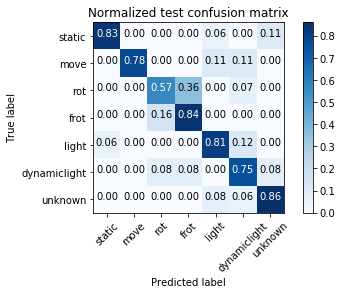

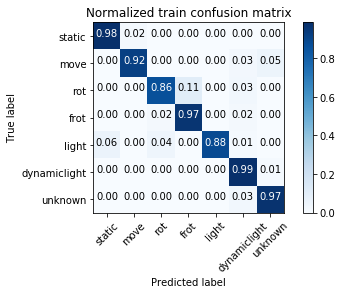

In [44]:
import itertools
definition = ['static', 'move', 'rot', 'frot', 'light', 'dynamiclight','unknown']
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
cnf_matrix_test = confusion_matrix(ground_test, preds_test)
cnf_matrix_train = confusion_matrix(ground_train, preds_train)
np.set_printoptions(precision=2)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
np.set_printoptions(precision=2)

# # Plot non-normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=definition,
#                       title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_test, classes=definition, normalize=True,
                      title='Normalized test confusion matrix')

plt.figure()
plot_confusion_matrix(cnf_matrix_train, classes=definition, normalize=True,
                      title='Normalized train confusion matrix')

plt.show()